important 変数を個々に定義する

In [1]:
SensorNum=3 # Sensor number
SampleNum=16 # Window Width
Overlap=0.5 # overlap
width=3000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note 
Axis='AccX' # Axis

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.regularizers import l1,l2,l1l2,activity_l1,activity_l2,activity_l1l2
import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 970 (CNMeM is disabled, cuDNN 4007)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
WORKSPACE_PATH = '/home/takeyama/pywork/ipython/2016-07-18'

StudyDataPath=WORKSPACE_PATH+'/Study/'+DataName+'/'+'Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataPath): os.makedirs(StudyDataPath)

GlaphDataPath=WORKSPACE_PATH+'/Graph/'+DataName+'/Learning-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(GlaphDataPath): os.makedirs(GlaphDataPath)

StudyDataModelPicPath=WORKSPACE_PATH+'/Study/'+DataName+'/modelPic-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataModelPicPath): os.makedirs(StudyDataModelPicPath)

WindowDataPath=WORKSPACE_PATH+'/window/'
RawDataPath=WORKSPACE_PATH+'/raw/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成**

In [7]:
w=window.Window()
w.SetData(Axis,dic[Axis])
wind=w.Compile(windowWidth=SampleNum,overlap=Overlap)
windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))

AccX is registed now
Build Complete
(254742,)


In [8]:
windoW.shape

(15921, 16)

**前回やった学習をもう１度やってみる  
今回は、正則化をする  
使用するものはl1( L1 weight regularization penalty, also known as LASSO )  
実際、どのくらいの重みにすればいいのかわからないので色々試してみる  **

In [9]:
ParameterL1=[0.01,0.1,0.3,0.5,0.7,0.9]

L1 parameter is 0.01
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 30s - loss: 0.0543 - val_loss: 0.0038
Epoch 2/50
15921/15921 [==============================] - 30s - loss: 0.0102 - val_loss: 0.0016
Epoch 3/50
15921/15921 [==============================] - 31s - loss: 0.0055 - val_loss: 7.9744e-04
Epoch 4/50
15921/15921 [==============================] - 39s - loss: 0.0029 - val_loss: 4.9352e-04
Epoch 5/50
15921/15921 [==============================] - 35s - loss: 0.0019 - val_loss: 3.7236e-04
Epoch 6/50
15921/15921 [==============================] - 35s - loss: 0.0018 - val_loss: 3.5978e-04
Epoch 7/50
15921/15921 [==============================] - 35s - loss: 0.0017 - val_loss: 6.7948e-04
Epoch 8/50
15921/15921 [==============================] - 35s - loss: 0.0017 - val_loss: 3.6210e-04
Epoch 9/50
15921/15921 [==============================] - 31s - loss: 0.0017 - val_loss: 3.4508e-04
Epoch 10/50
15921/15921 [============

/home/takeyama/.pyenv/versions/takeyama/lib/python2.7/site-packages/keras/backend/theano_backend.py:514: UserWarning: theano.function was asked to create a function computing outputs given certain inputs, but the provided input variable at index 1 is not part of the computational graph needed to compute the outputs: keras_learning_phase.
To make this warning into an error, you can pass the parameter on_unused_input='raise' to theano.function. To disable it completely, use on_unused_input='ignore'.
  **kwargs)


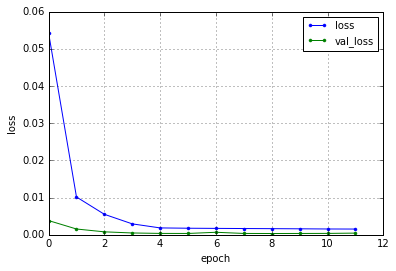

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 30s - loss: 0.0749 - val_loss: 0.0039
Epoch 2/50
15921/15921 [==============================] - 30s - loss: 0.0119 - val_loss: 0.0018
Epoch 3/50
15921/15921 [==============================] - 30s - loss: 0.0051 - val_loss: 7.4081e-04
Epoch 4/50
15921/15921 [==============================] - 30s - loss: 0.0025 - val_loss: 2.8924e-04
Epoch 5/50
15921/15921 [==============================] - 30s - loss: 0.0022 - val_loss: 4.5428e-04
Epoch 6/50
15921/15921 [==============================] - 30s - loss: 0.0021 - val_loss: 2.3986e-04
Epoch 7/50
15921/15921 [==============================] - 29s - loss: 0.0021 - val_loss: 2.2750e-04
Epoch 8/50
15921/15921 [==============================] - 30s - loss: 0.0020 - val_loss: 3.9198e-04
Epoch 9/50
15921/15921 [==============================] - 30s - loss: 0.0019 - val_loss: 8.9594e-04
Epoch 10/50
15921/15921 [==============================] -

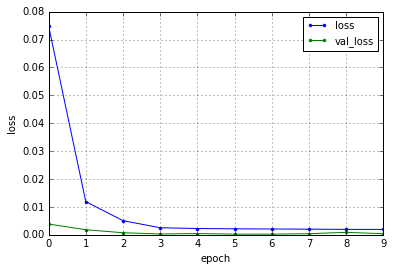

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 25s - loss: 0.0693 - val_loss: 0.0031
Epoch 2/50
15921/15921 [==============================] - 25s - loss: 0.0110 - val_loss: 7.9648e-04
Epoch 3/50
15921/15921 [==============================] - 25s - loss: 0.0054 - val_loss: 3.2068e-04
Epoch 4/50
15921/15921 [==============================] - 25s - loss: 0.0032 - val_loss: 5.5571e-04
Epoch 5/50
15921/15921 [==============================] - 24s - loss: 0.0030 - val_loss: 0.0028
Epoch 6/50
15921/15921 [==============================] - 25s - loss: 0.0028 - val_loss: 0.0028


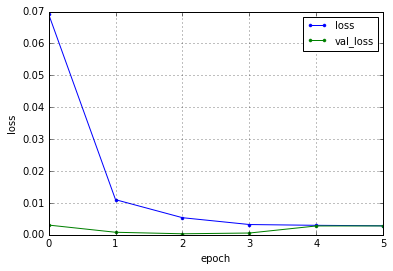

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 25s - loss: 0.0521 - val_loss: 0.0011
Epoch 2/50
15921/15921 [==============================] - 25s - loss: 0.0087 - val_loss: 3.3921e-04
Epoch 3/50
15921/15921 [==============================] - 24s - loss: 0.0037 - val_loss: 9.1004e-04
Epoch 4/50
15921/15921 [==============================] - 25s - loss: 0.0031 - val_loss: 0.0014
Epoch 5/50
15921/15921 [==============================] - 25s - loss: 0.0029 - val_loss: 1.9970e-04
Epoch 6/50
15921/15921 [==============================] - 25s - loss: 0.0028 - val_loss: 1.9099e-04
Epoch 7/50
15921/15921 [==============================] - 25s - loss: 0.0027 - val_loss: 1.9897e-04
Epoch 8/50
15921/15921 [==============================] - 24s - loss: 0.0027 - val_loss: 4.4845e-04
Epoch 9/50
15921/15921 [==============================] - 25s - loss: 0.0027 - val_loss: 1.7451e-04
Epoch 10/50
15921/15921 [==============================] -

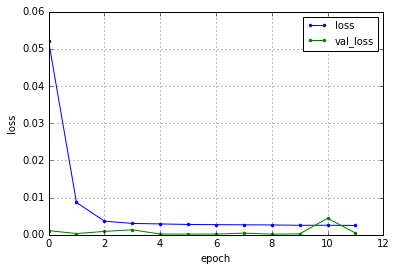

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 21s - loss: 0.0503 - val_loss: 0.0013
Epoch 2/50
15921/15921 [==============================] - 23s - loss: 0.0092 - val_loss: 2.3949e-04
Epoch 3/50
15921/15921 [==============================] - 30s - loss: 0.0055 - val_loss: 1.8680e-04
Epoch 4/50
15921/15921 [==============================] - 30s - loss: 0.0048 - val_loss: 2.5622e-04
Epoch 5/50
15921/15921 [==============================] - 30s - loss: 0.0046 - val_loss: 2.0901e-04
Epoch 6/50
15921/15921 [==============================] - 30s - loss: 0.0044 - val_loss: 0.0012


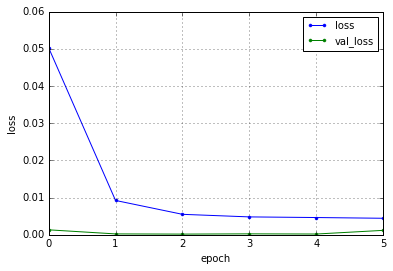

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 30s - loss: 0.0569 - val_loss: 0.0016
Epoch 2/50
15921/15921 [==============================] - 30s - loss: 0.0114 - val_loss: 0.0012
Epoch 3/50
15921/15921 [==============================] - 30s - loss: 0.0080 - val_loss: 7.0980e-04
Epoch 4/50
15921/15921 [==============================] - 30s - loss: 0.0080 - val_loss: 0.0010
Epoch 5/50
15921/15921 [==============================] - 30s - loss: 0.0081 - val_loss: 0.0016
Epoch 6/50
15921/15921 [==============================] - 30s - loss: 0.0082 - val_loss: 0.0014


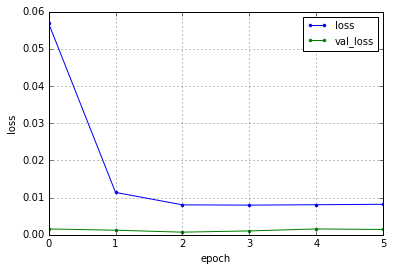

L1 parameter is 0.1
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 30s - loss: 0.2004 - val_loss: 0.0224
Epoch 2/50
15921/15921 [==============================] - 30s - loss: 0.0252 - val_loss: 0.0052
Epoch 3/50
15921/15921 [==============================] - 30s - loss: 0.0127 - val_loss: 0.0024
Epoch 4/50
15921/15921 [==============================] - 30s - loss: 0.0107 - val_loss: 0.0022
Epoch 5/50
15921/15921 [==============================] - 30s - loss: 0.0098 - val_loss: 0.0023
Epoch 6/50
15921/15921 [==============================] - 30s - loss: 0.0092 - val_loss: 0.0018
Epoch 7/50
15921/15921 [==============================] - 30s - loss: 0.0089 - val_loss: 0.0077
Epoch 8/50
15921/15921 [==============================] - 30s - loss: 0.0085 - val_loss: 0.0015
Epoch 9/50
15921/15921 [==============================] - 29s - loss: 0.0082 - val_loss: 0.0020
Epoch 10/50
15921/15921 [==============================] - 30s - l

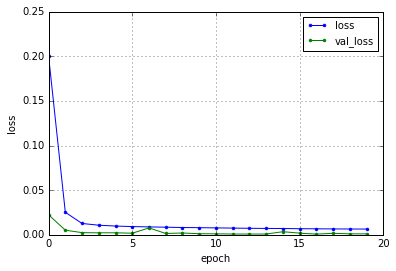

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 25s - loss: 0.1632 - val_loss: 0.0111
Epoch 2/50
15921/15921 [==============================] - 24s - loss: 0.0203 - val_loss: 0.0019
Epoch 3/50
15921/15921 [==============================] - 25s - loss: 0.0151 - val_loss: 0.0015
Epoch 4/50
15921/15921 [==============================] - 25s - loss: 0.0132 - val_loss: 0.0012
Epoch 5/50
15921/15921 [==============================] - 24s - loss: 0.0122 - val_loss: 0.0021
Epoch 6/50
15921/15921 [==============================] - 25s - loss: 0.0116 - val_loss: 0.0037
Epoch 7/50
15921/15921 [==============================] - 25s - loss: 0.0111 - val_loss: 0.0011
Epoch 8/50
15921/15921 [==============================] - 25s - loss: 0.0108 - val_loss: 0.0011
Epoch 9/50
15921/15921 [==============================] - 25s - loss: 0.0104 - val_loss: 0.0015
Epoch 10/50
15921/15921 [==============================] - 25s - loss: 0.0102 - val_lo

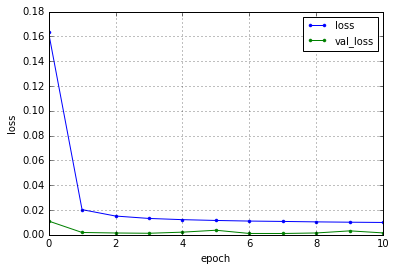

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 25s - loss: 0.1949 - val_loss: 0.0058
Epoch 2/50
15921/15921 [==============================] - 25s - loss: 0.0216 - val_loss: 0.0028
Epoch 3/50
15921/15921 [==============================] - 25s - loss: 0.0185 - val_loss: 0.0016
Epoch 4/50
15921/15921 [==============================] - 25s - loss: 0.0171 - val_loss: 0.0019
Epoch 5/50
15921/15921 [==============================] - 25s - loss: 0.0164 - val_loss: 0.0049
Epoch 6/50
15921/15921 [==============================] - 25s - loss: 0.0159 - val_loss: 0.0011
Epoch 7/50
15921/15921 [==============================] - 24s - loss: 0.0156 - val_loss: 0.0012
Epoch 8/50
15921/15921 [==============================] - 25s - loss: 0.0155 - val_loss: 9.8780e-04
Epoch 9/50
15921/15921 [==============================] - 25s - loss: 0.0154 - val_loss: 0.0012
Epoch 10/50
15921/15921 [==============================] - 25s - loss: 0.0154 - va

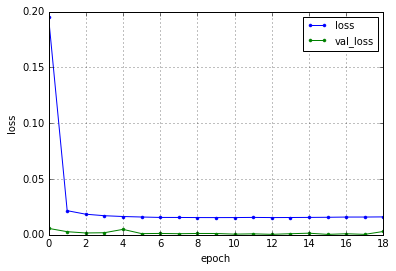

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 25s - loss: 0.1578 - val_loss: 0.0042
Epoch 2/50
15921/15921 [==============================] - 25s - loss: 0.0251 - val_loss: 0.0018
Epoch 3/50
15921/15921 [==============================] - 24s - loss: 0.0210 - val_loss: 0.0016
Epoch 4/50
15921/15921 [==============================] - 25s - loss: 0.0199 - val_loss: 0.0013
Epoch 5/50
15921/15921 [==============================] - 25s - loss: 0.0193 - val_loss: 0.0011
Epoch 6/50
15921/15921 [==============================] - 24s - loss: 0.0190 - val_loss: 9.6483e-04
Epoch 7/50
15921/15921 [==============================] - 25s - loss: 0.0188 - val_loss: 6.2143e-04
Epoch 8/50
15921/15921 [==============================] - 25s - loss: 0.0189 - val_loss: 0.0021
Epoch 9/50
15921/15921 [==============================] - 25s - loss: 0.0192 - val_loss: 0.0018
Epoch 10/50
15921/15921 [==============================] - 96s - loss: 0.0192 

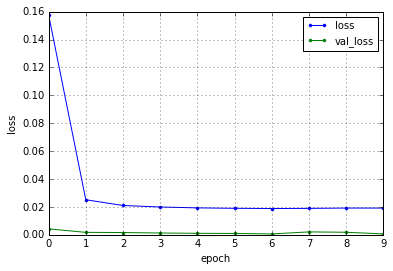

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 144s - loss: 0.1571 - val_loss: 0.0022
Epoch 2/50
15921/15921 [==============================] - 130s - loss: 0.0387 - val_loss: 0.0030
Epoch 3/50
15921/15921 [==============================] - 130s - loss: 0.0361 - val_loss: 0.0011
Epoch 4/50
15921/15921 [==============================] - 137s - loss: 0.0350 - val_loss: 0.0031
Epoch 5/50
15921/15921 [==============================] - 130s - loss: 0.0354 - val_loss: 0.0013
Epoch 6/50
15921/15921 [==============================] - 137s - loss: 0.0363 - val_loss: 0.0011


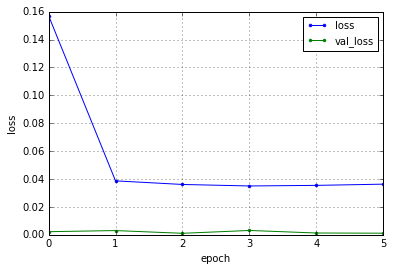

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 131s - loss: 0.2077 - val_loss: 0.0033
Epoch 2/50
15921/15921 [==============================] - 137s - loss: 0.0638 - val_loss: 0.0020
Epoch 3/50
15921/15921 [==============================] - 131s - loss: 0.0674 - val_loss: 0.0028
Epoch 4/50
15921/15921 [==============================] - 137s - loss: 0.0728 - val_loss: 0.0036
Epoch 5/50
15921/15921 [==============================] - 132s - loss: 0.0765 - val_loss: 0.0015
Epoch 6/50
15921/15921 [==============================] - 132s - loss: 0.0795 - val_loss: 0.0034
Epoch 7/50
15921/15921 [==============================] - 136s - loss: 0.0822 - val_loss: 0.0032
Epoch 8/50
15921/15921 [==============================] - 131s - loss: 0.0845 - val_loss: 0.0030


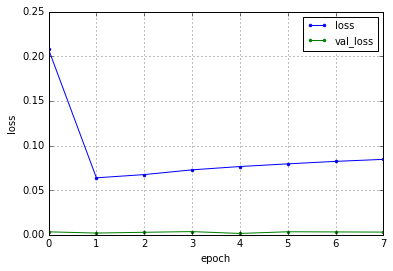

L1 parameter is 0.3
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 136s - loss: 0.2708 - val_loss: 0.0390
Epoch 2/50
15921/15921 [==============================] - 130s - loss: 0.0494 - val_loss: 0.0323
Epoch 3/50
15921/15921 [==============================] - 136s - loss: 0.0404 - val_loss: 0.0152
Epoch 4/50
15921/15921 [==============================] - 130s - loss: 0.0311 - val_loss: 0.0066
Epoch 5/50
15921/15921 [==============================] - 136s - loss: 0.0263 - val_loss: 0.0041
Epoch 6/50
15921/15921 [==============================] - 132s - loss: 0.0236 - val_loss: 0.0036
Epoch 7/50
15921/15921 [==============================] - 134s - loss: 0.0217 - val_loss: 0.0028
Epoch 8/50
15921/15921 [==============================] - 133s - loss: 0.0204 - val_loss: 0.0026
Epoch 9/50
15921/15921 [==============================] - 130s - loss: 0.0194 - val_loss: 0.0030
Epoch 10/50
15921/15921 [==============================] 

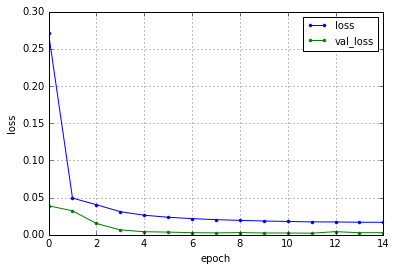

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 136s - loss: 0.2687 - val_loss: 0.0339
Epoch 2/50
15921/15921 [==============================] - 129s - loss: 0.0552 - val_loss: 0.0194
Epoch 3/50
15921/15921 [==============================] - 130s - loss: 0.0437 - val_loss: 0.0076
Epoch 4/50
15921/15921 [==============================] - 135s - loss: 0.0370 - val_loss: 0.0043
Epoch 5/50
15921/15921 [==============================] - 130s - loss: 0.0338 - val_loss: 0.0069
Epoch 6/50
15921/15921 [==============================] - 133s - loss: 0.0317 - val_loss: 0.0029
Epoch 7/50
15921/15921 [==============================] - 130s - loss: 0.0307 - val_loss: 0.0060
Epoch 8/50
15921/15921 [==============================] - 134s - loss: 0.0301 - val_loss: 0.0048
Epoch 9/50
15921/15921 [==============================] - 133s - loss: 0.0299 - val_loss: 0.0058


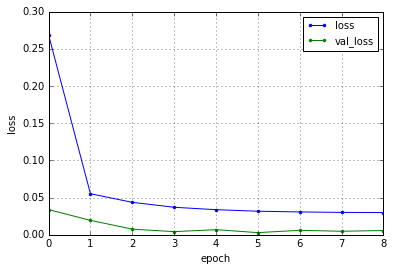

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 136s - loss: 0.2193 - val_loss: 0.0100
Epoch 2/50
15921/15921 [==============================] - 132s - loss: 0.0520 - val_loss: 0.0029
Epoch 3/50
15921/15921 [==============================] - 136s - loss: 0.0461 - val_loss: 0.0019
Epoch 4/50
15921/15921 [==============================] - 131s - loss: 0.0431 - val_loss: 0.0016
Epoch 5/50
15921/15921 [==============================] - 130s - loss: 0.0407 - val_loss: 0.0020
Epoch 6/50
15921/15921 [==============================] - 136s - loss: 0.0393 - val_loss: 0.0024
Epoch 7/50
15921/15921 [==============================] - 131s - loss: 0.0389 - val_loss: 0.0022


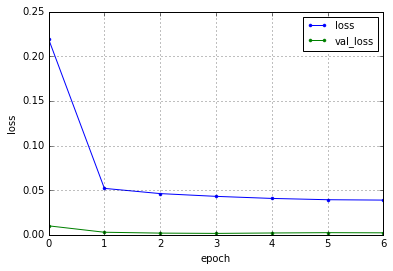

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 136s - loss: 0.3054 - val_loss: 0.0163
Epoch 2/50
15921/15921 [==============================] - 130s - loss: 0.0633 - val_loss: 0.0059
Epoch 3/50
15921/15921 [==============================] - 137s - loss: 0.0544 - val_loss: 0.0037
Epoch 4/50
15921/15921 [==============================] - 131s - loss: 0.0529 - val_loss: 0.0029
Epoch 5/50
15921/15921 [==============================] - 137s - loss: 0.0539 - val_loss: 0.0042
Epoch 6/50
15921/15921 [==============================] - 130s - loss: 0.0543 - val_loss: 0.0027
Epoch 7/50
15921/15921 [==============================] - 130s - loss: 0.0552 - val_loss: 0.0063
Epoch 8/50
15921/15921 [==============================] - 134s - loss: 0.0560 - val_loss: 0.0029
Epoch 9/50
15921/15921 [==============================] - 130s - loss: 0.0569 - val_loss: 0.0023
Epoch 10/50
15921/15921 [==============================] - 136s - loss: 0.057

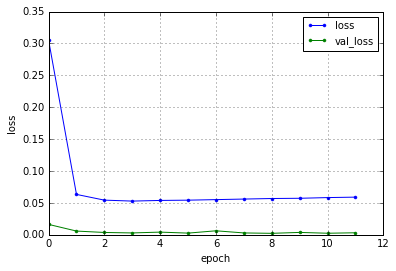

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 132s - loss: 0.3466 - val_loss: 0.0259
Epoch 2/50
15921/15921 [==============================] - 136s - loss: 0.1073 - val_loss: 0.0117
Epoch 3/50
15921/15921 [==============================] - 131s - loss: 0.0975 - val_loss: 0.0063
Epoch 4/50
15921/15921 [==============================] - 135s - loss: 0.0956 - val_loss: 0.0095
Epoch 5/50
15921/15921 [==============================] - 132s - loss: 0.0980 - val_loss: 0.0078
Epoch 6/50
15921/15921 [==============================] - 130s - loss: 0.1012 - val_loss: 0.0049
Epoch 7/50
15921/15921 [==============================] - 137s - loss: 0.1063 - val_loss: 0.0035
Epoch 8/50
15921/15921 [==============================] - 131s - loss: 0.1103 - val_loss: 0.0036
Epoch 9/50
15921/15921 [==============================] - 136s - loss: 0.1148 - val_loss: 0.0043
Epoch 10/50
15921/15921 [==============================] - 86s - loss: 0.1179

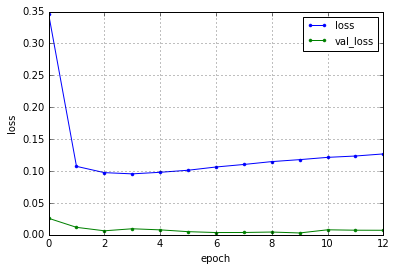

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 19s - loss: 0.4696 - val_loss: 0.0260
Epoch 2/50
15921/15921 [==============================] - 19s - loss: 0.1855 - val_loss: 0.0179
Epoch 3/50
15921/15921 [==============================] - 20s - loss: 0.1872 - val_loss: 0.0127
Epoch 4/50
15921/15921 [==============================] - 20s - loss: 0.1920 - val_loss: 0.0058
Epoch 5/50
15921/15921 [==============================] - 20s - loss: 0.2058 - val_loss: 0.0048
Epoch 6/50
15921/15921 [==============================] - 20s - loss: 0.2205 - val_loss: 0.0044
Epoch 7/50
15921/15921 [==============================] - 19s - loss: 0.2335 - val_loss: 0.0095
Epoch 8/50
15921/15921 [==============================] - 20s - loss: 0.2450 - val_loss: 0.0028
Epoch 9/50
15921/15921 [==============================] - 20s - loss: 0.2551 - val_loss: 0.0079
Epoch 10/50
15921/15921 [==============================] - 20s - loss: 0.2619 - val_lo

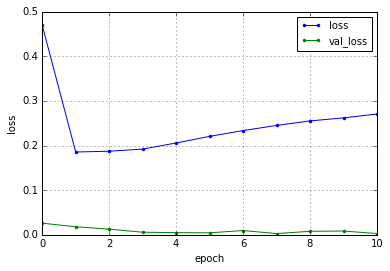

L1 parameter is 0.5
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 20s - loss: 0.2636 - val_loss: 0.0411
Epoch 2/50
15921/15921 [==============================] - 20s - loss: 0.0585 - val_loss: 0.0400
Epoch 3/50
15921/15921 [==============================] - 20s - loss: 0.0561 - val_loss: 0.0346
Epoch 4/50
15921/15921 [==============================] - 19s - loss: 0.0516 - val_loss: 0.0251
Epoch 5/50
15921/15921 [==============================] - 20s - loss: 0.0443 - val_loss: 0.0139
Epoch 6/50
15921/15921 [==============================] - 20s - loss: 0.0385 - val_loss: 0.0070
Epoch 7/50
15921/15921 [==============================] - 20s - loss: 0.0357 - val_loss: 0.0055
Epoch 8/50
15921/15921 [==============================] - 20s - loss: 0.0340 - val_loss: 0.0049
Epoch 9/50
15921/15921 [==============================] - 19s - loss: 0.0325 - val_loss: 0.0065
Epoch 10/50
15921/15921 [==============================] - 19s - l

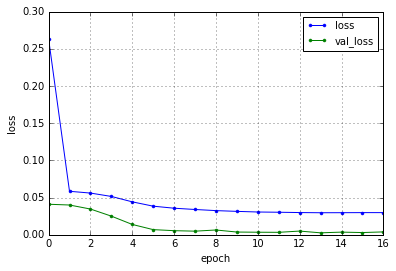

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 141s - loss: 0.3190 - val_loss: 0.0337
Epoch 2/50
15921/15921 [==============================] - 135s - loss: 0.0732 - val_loss: 0.0287
Epoch 3/50
15921/15921 [==============================] - 142s - loss: 0.0585 - val_loss: 0.0199
Epoch 4/50
15921/15921 [==============================] - 137s - loss: 0.0520 - val_loss: 0.0098
Epoch 5/50
15921/15921 [==============================] - 140s - loss: 0.0482 - val_loss: 0.0077
Epoch 6/50
15921/15921 [==============================] - 134s - loss: 0.0454 - val_loss: 0.0059
Epoch 7/50
15921/15921 [==============================] - 141s - loss: 0.0441 - val_loss: 0.0052
Epoch 8/50
15921/15921 [==============================] - 136s - loss: 0.0431 - val_loss: 0.0065
Epoch 9/50
15921/15921 [==============================] - 141s - loss: 0.0423 - val_loss: 0.0063
Epoch 10/50
15921/15921 [==============================] - 136s - loss: 0.042

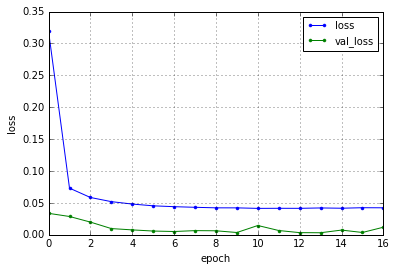

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 141s - loss: 0.3342 - val_loss: 0.0373
Epoch 2/50
15921/15921 [==============================] - 134s - loss: 0.0987 - val_loss: 0.0324
Epoch 3/50
15921/15921 [==============================] - 142s - loss: 0.0822 - val_loss: 0.0201
Epoch 4/50
15921/15921 [==============================] - 136s - loss: 0.0690 - val_loss: 0.0110
Epoch 5/50
15921/15921 [==============================] - 142s - loss: 0.0640 - val_loss: 0.0099
Epoch 6/50
15921/15921 [==============================] - 135s - loss: 0.0619 - val_loss: 0.0100
Epoch 7/50
15921/15921 [==============================] - 141s - loss: 0.0600 - val_loss: 0.0042
Epoch 8/50
15921/15921 [==============================] - 136s - loss: 0.0595 - val_loss: 0.0086
Epoch 9/50
15921/15921 [==============================] - 140s - loss: 0.0602 - val_loss: 0.0039
Epoch 10/50
15921/15921 [==============================] - 136s - loss: 0.060

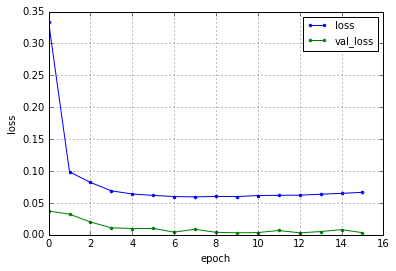

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 135s - loss: 0.3769 - val_loss: 0.0369
Epoch 2/50
15921/15921 [==============================] - 142s - loss: 0.1147 - val_loss: 0.0329
Epoch 3/50
15921/15921 [==============================] - 135s - loss: 0.0973 - val_loss: 0.0237
Epoch 4/50
15921/15921 [==============================] - 142s - loss: 0.0895 - val_loss: 0.0130
Epoch 5/50
15921/15921 [==============================] - 137s - loss: 0.0854 - val_loss: 0.0245
Epoch 6/50
15921/15921 [==============================] - 142s - loss: 0.0834 - val_loss: 0.0060
Epoch 7/50
15921/15921 [==============================] - 137s - loss: 0.0825 - val_loss: 0.0050
Epoch 8/50
15921/15921 [==============================] - 142s - loss: 0.0835 - val_loss: 0.0044
Epoch 9/50
15921/15921 [==============================] - 137s - loss: 0.0858 - val_loss: 0.0053
Epoch 10/50
15921/15921 [==============================] - 141s - loss: 0.086

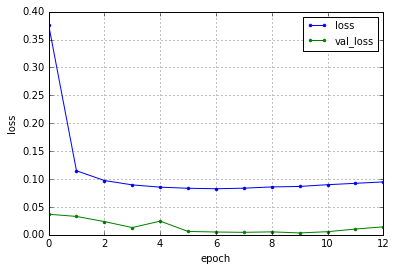

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 134s - loss: 0.4626 - val_loss: 0.0371
Epoch 2/50
15921/15921 [==============================] - 142s - loss: 0.1768 - val_loss: 0.0330
Epoch 3/50
15921/15921 [==============================] - 133s - loss: 0.1655 - val_loss: 0.0215
Epoch 4/50
15921/15921 [==============================] - 141s - loss: 0.1579 - val_loss: 0.0280
Epoch 5/50
15921/15921 [==============================] - 134s - loss: 0.1564 - val_loss: 0.0100
Epoch 6/50
15921/15921 [==============================] - 142s - loss: 0.1588 - val_loss: 0.0078
Epoch 7/50
15921/15921 [==============================] - 135s - loss: 0.1633 - val_loss: 0.0054
Epoch 8/50
15921/15921 [==============================] - 141s - loss: 0.1717 - val_loss: 0.0053
Epoch 9/50
15921/15921 [==============================] - 137s - loss: 0.1816 - val_loss: 0.0069
Epoch 10/50
15921/15921 [==============================] - 138s - loss: 0.190

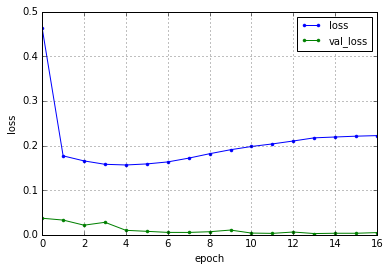

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 129s - loss: 0.6622 - val_loss: 0.0360
Epoch 2/50
15921/15921 [==============================] - 127s - loss: 0.3179 - val_loss: 0.0314
Epoch 3/50
15921/15921 [==============================] - 127s - loss: 0.3249 - val_loss: 0.0205
Epoch 4/50
15921/15921 [==============================] - 122s - loss: 0.3243 - val_loss: 0.0169
Epoch 5/50
15921/15921 [==============================] - 128s - loss: 0.3308 - val_loss: 0.0331
Epoch 6/50
15921/15921 [==============================] - 54s - loss: 0.3424 - val_loss: 0.0167
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.3558 - val_loss: 0.0191
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.3752 - val_loss: 0.0072
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.3968 - val_loss: 0.0051
Epoch 10/50
15921/15921 [==============================] - 13s - loss: 0.4190 - v

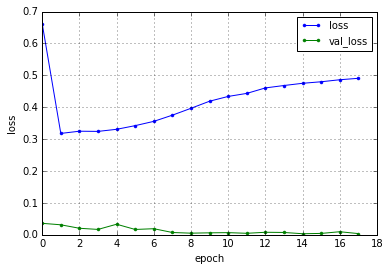

L1 parameter is 0.7
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.2750 - val_loss: 0.0408
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.0763 - val_loss: 0.0412
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0695 - val_loss: 0.0408
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0660 - val_loss: 0.0401
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0650 - val_loss: 0.0391
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0638 - val_loss: 0.0379
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.0616 - val_loss: 0.0341
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.0581 - val_loss: 0.0269
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0530 - val_loss: 0.0160
Epoch 10/50
15921/15921 [==============================] - 14s - l

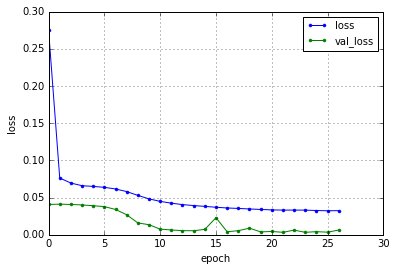

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.3002 - val_loss: 0.0389
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.0920 - val_loss: 0.0382
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.0828 - val_loss: 0.0350
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0782 - val_loss: 0.0295
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0727 - val_loss: 0.0229
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0675 - val_loss: 0.0148
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0638 - val_loss: 0.0094
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0612 - val_loss: 0.0076
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.0594 - val_loss: 0.0061
Epoch 10/50
15921/15921 [==============================] - 15s - loss: 0.0580 - val_lo

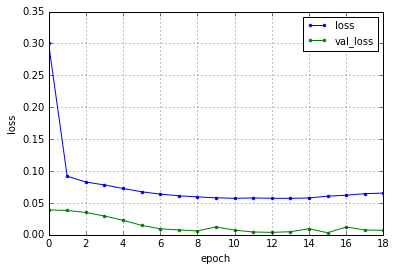

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.4508 - val_loss: 0.0366
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.1346 - val_loss: 0.0365
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.1092 - val_loss: 0.0320
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.1000 - val_loss: 0.0244
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0943 - val_loss: 0.0163
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.0888 - val_loss: 0.0100
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0867 - val_loss: 0.0079
Epoch 8/50
15921/15921 [==============================] - 13s - loss: 0.0872 - val_loss: 0.0065
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0869 - val_loss: 0.0074
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.0881 - val_lo

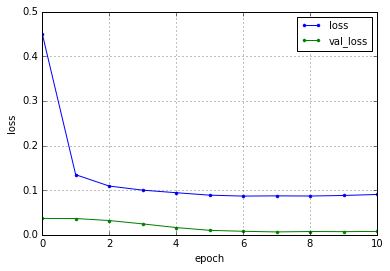

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.5028 - val_loss: 0.0396
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.1665 - val_loss: 0.0356
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.1395 - val_loss: 0.0336
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.1297 - val_loss: 0.0272
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.1257 - val_loss: 0.0204
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.1211 - val_loss: 0.0119
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.1178 - val_loss: 0.0131
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.1179 - val_loss: 0.0100
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.1187 - val_loss: 0.0088
Epoch 10/50
15921/15921 [==============================] - 15s - loss: 0.1208 - val_lo

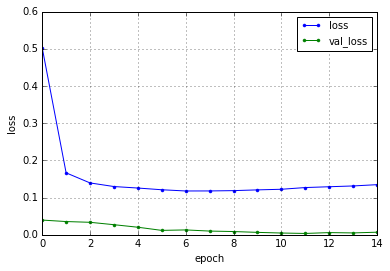

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.5400 - val_loss: 0.0374
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.2437 - val_loss: 0.0338
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.2341 - val_loss: 0.0293
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.2315 - val_loss: 0.0313
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.2266 - val_loss: 0.0239
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.2265 - val_loss: 0.0202
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.2274 - val_loss: 0.0124
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.2351 - val_loss: 0.0201
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.2445 - val_loss: 0.0085
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.2539 - val_lo

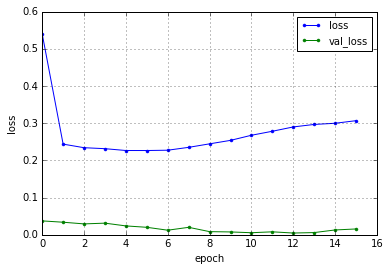

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.8469 - val_loss: 0.0353
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.4605 - val_loss: 0.0315
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.4733 - val_loss: 0.0258
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.4802 - val_loss: 0.0252
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.4854 - val_loss: 0.0188
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.5073 - val_loss: 0.0129
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.5237 - val_loss: 0.0189
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.5487 - val_loss: 0.0161
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.5731 - val_loss: 0.0081
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.6002 - val_lo

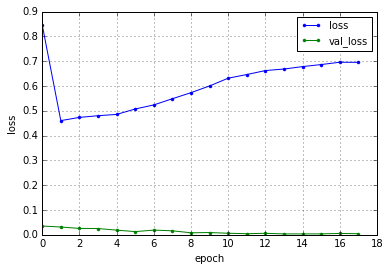

L1 parameter is 0.9
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.3437 - val_loss: 0.0416
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.0967 - val_loss: 0.0401
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0777 - val_loss: 0.0405
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0681 - val_loss: 0.0398
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0660 - val_loss: 0.0361
Epoch 6/50
15921/15921 [==============================] - 13s - loss: 0.0634 - val_loss: 0.0332
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0596 - val_loss: 0.0242
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0552 - val_loss: 0.0154
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0515 - val_loss: 0.0098
Epoch 10/50
15921/15921 [==============================] - 14s - l

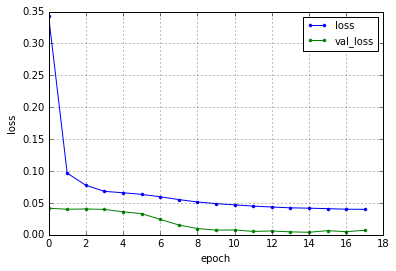

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 11s - loss: 0.3539 - val_loss: 0.0395
Epoch 2/50
15921/15921 [==============================] - 13s - loss: 0.1071 - val_loss: 0.0396
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0992 - val_loss: 0.0389
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0962 - val_loss: 0.0372
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0931 - val_loss: 0.0347
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.0898 - val_loss: 0.0294
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0865 - val_loss: 0.0221
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0818 - val_loss: 0.0171
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0785 - val_loss: 0.0122
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.0755 - val_lo

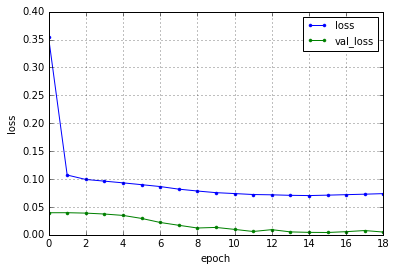

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.4842 - val_loss: 0.0396
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.1656 - val_loss: 0.0398
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.1423 - val_loss: 0.0375
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.1261 - val_loss: 0.0385
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.1186 - val_loss: 0.0338
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.1146 - val_loss: 0.0288
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.1091 - val_loss: 0.0303
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.1051 - val_loss: 0.0152
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.1020 - val_loss: 0.0223
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.1000 - val_lo

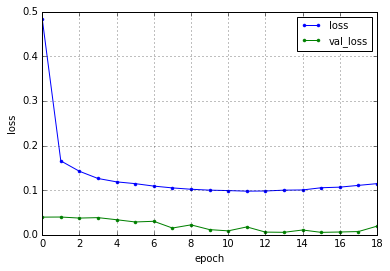

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.5719 - val_loss: 0.0392
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.2043 - val_loss: 0.0374
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.1685 - val_loss: 0.0376
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.1581 - val_loss: 0.0347
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.1522 - val_loss: 0.0355
Epoch 6/50
15921/15921 [==============================] - 13s - loss: 0.1472 - val_loss: 0.0298
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.1424 - val_loss: 0.0199
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.1380 - val_loss: 0.0158
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.1349 - val_loss: 0.0139
Epoch 10/50
15921/15921 [==============================] - 15s - loss: 0.1343 - val_lo

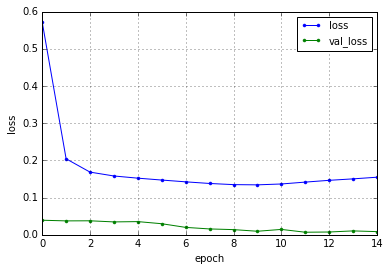

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.6789 - val_loss: 0.0394
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.3040 - val_loss: 0.0375
Epoch 3/50
15921/15921 [==============================] - 13s - loss: 0.2987 - val_loss: 0.0368
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.3064 - val_loss: 0.0343
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.3030 - val_loss: 0.0302
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.2937 - val_loss: 0.0252
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.2883 - val_loss: 0.0296
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.2911 - val_loss: 0.0176
Epoch 9/50
15921/15921 [==============================] - 13s - loss: 0.3005 - val_loss: 0.0347
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.3054 - val_lo

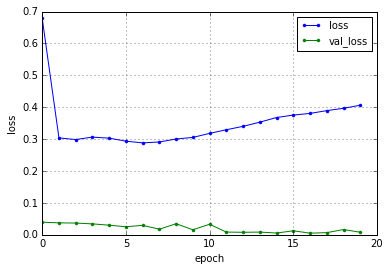

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 1.0444 - val_loss: 0.0381
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.5931 - val_loss: 0.0361
Epoch 3/50
15921/15921 [==============================] - 13s - loss: 0.6309 - val_loss: 0.0320
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.6527 - val_loss: 0.0321
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.6657 - val_loss: 0.0253
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.6737 - val_loss: 0.0332
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.6863 - val_loss: 0.0279
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.7063 - val_loss: 0.0208
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.7264 - val_loss: 0.0248
Epoch 10/50
15921/15921 [==============================] - 15s - loss: 0.7358 - val_lo

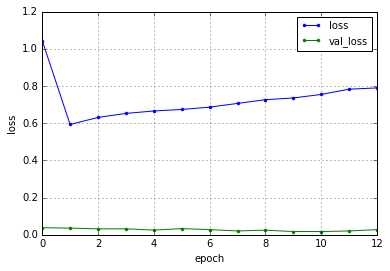

In [10]:
for pl1 in ParameterL1:
    print 'L1 parameter is '+str(pl1)
    for encoding_dim in EncodingDim:
        # define SaveFileName
        commonLabel='_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'-L1='+str(pl1)
        SaveFileNameEncord=DataName+'_encoded'+commonLabel
        SaveFileNameDecord=DataName+'_decoded'+commonLabel
        SaveFileNameNet=DataName+'_net'+'_edim='+commonLabel
        SaveFileNameTrain=DataName+'_train'+commonLabel
        SaveFileNameTest=DataName+'_test'+commonLabel
        SaveFileNameGlaph=GlaphDataPath+DataName+commonLabel+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh',
                       activity_regularizer=activity_l1(pl1))(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer='adadelta', loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=2)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        batch_size=shapeNum/4,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])

        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5')

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5')

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5')

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()